# PHQ615 : Calculs 

## Calcul de la connexion affine et du tenseur de courbure à partir de la métrique

## Métrique de Friedmann-Lemaître

In [4]:
from sympy import *
from sympy import Array

init_printing()

r, θ, ϕ, k, E = symbols('r, θ, ϕ, k, E')
gd = E*E*Array([[1/(1-k*r*r), 0, 0], [0, r**2, 0],[0, 0, r**2*sin(θ)**2]])
coords = Array([r, θ, ϕ])
gu = (1/(E*E))*Array([[(1-k*r*r), 0, 0], [0, 1/r**2, 0],[0, 0, 1/(r**2*sin(θ)**2)]])
gd

⎡     2                          ⎤
⎢    E                           ⎥
⎢──────────    0          0      ⎥
⎢     2                          ⎥
⎢- k⋅r  + 1                      ⎥
⎢                                ⎥
⎢             2  2               ⎥
⎢    0       E ⋅r         0      ⎥
⎢                                ⎥
⎢                    2  2    2   ⎥
⎣    0         0    E ⋅r ⋅sin (θ)⎦

In [5]:
gu

⎡     2                          ⎤
⎢- k⋅r  + 1                      ⎥
⎢──────────    0          0      ⎥
⎢     2                          ⎥
⎢    E                           ⎥
⎢                                ⎥
⎢              1                 ⎥
⎢    0       ─────        0      ⎥
⎢             2  2               ⎥
⎢            E ⋅r                ⎥
⎢                                ⎥
⎢                         1      ⎥
⎢    0         0    ─────────────⎥
⎢                    2  2    2   ⎥
⎣                   E ⋅r ⋅sin (θ)⎦

In [6]:
# connexion affine 'covariante'
dg = derive_by_array(gd, coords)
gammad = (permutedims(dg,(2,0,1)) + permutedims(dg,(2,1,0))-dg)/2
gammad = factor(gammad)
gammad

⎡⎡    2                            ⎤                                          
⎢⎢   E ⋅k⋅r                        ⎥                                          
⎢⎢───────────    0          0      ⎥  ⎡       2                        ⎤  ⎡   
⎢⎢          2                      ⎥  ⎢ 0    E ⋅r           0          ⎥  ⎢   
⎢⎢⎛   2    ⎞                       ⎥  ⎢                                ⎥  ⎢   
⎢⎢⎝k⋅r  - 1⎠                       ⎥  ⎢ 2                              ⎥  ⎢   
⎢⎢                                 ⎥  ⎢E ⋅r   0             0          ⎥  ⎢   
⎢⎢               2                 ⎥  ⎢                                ⎥  ⎢   
⎢⎢     0       -E ⋅r        0      ⎥  ⎢              2  2              ⎥  ⎢ 2 
⎢⎢                                 ⎥  ⎣ 0     0    -E ⋅r ⋅sin(θ)⋅cos(θ)⎦  ⎣E ⋅
⎢⎢                      2      2   ⎥                                          
⎣⎣     0         0    -E ⋅r⋅sin (θ)⎦                                          

                                                   

In [7]:
# connexion affine
Γ = tensorcontraction(tensorproduct(gu, gammad), (1,2))
Γ = simplify(Γ)
Γ

⎡⎡ -k⋅r                                   ⎤  ⎡   1            ⎤  ⎡            
⎢⎢────────     0               0          ⎥  ⎢0  ─      0     ⎥  ⎢0    0      
⎢⎢   2                                    ⎥  ⎢   r            ⎥  ⎢            
⎢⎢k⋅r  - 1                                ⎥  ⎢                ⎥  ⎢            
⎢⎢                                        ⎥  ⎢1               ⎥  ⎢            
⎢⎢             3                          ⎥  ⎢─  0      0     ⎥  ⎢0    0     ─
⎢⎢   0      k⋅r  - r           0          ⎥  ⎢r               ⎥  ⎢           t
⎢⎢                                        ⎥  ⎢                ⎥  ⎢            
⎢⎢                      ⎛   2    ⎞    2   ⎥  ⎢      -sin(2⋅θ) ⎥  ⎢1    1      
⎢⎣   0         0      r⋅⎝k⋅r  - 1⎠⋅sin (θ)⎦  ⎢0  0  ──────────⎥  ⎢─  ──────   
⎣                                            ⎣          2     ⎦  ⎣r  tan(θ)   

 1   ⎤⎤
 ─   ⎥⎥
 r   ⎥⎥
     ⎥⎥
 1   ⎥⎥
─────⎥⎥
an(θ)⎥⎥
     ⎥⎥
     ⎥⎥
 0   ⎥⎥
     ⎦⎦

## Calcul du tenseur de courbure

In [8]:
R1 = derive_by_array(Γ, coords)
C = tensorcontraction(tensorproduct(Γ, Γ), (0,4))
R = permutedims(R1,(1,2,0,3)) - permutedims(R1,(1,2,3,0)) + permutedims(C,(2,0,3,1)) - permutedims(C,(2,0,1,3))
R = simplify(R)
R

⎡                                           ⎡                                 
⎢                                           ⎢      0        0                 
⎢                         ⎡          2   ⎤  ⎢                                 
⎢       ⎡0  0  0⎤         ⎢  0    k⋅r   0⎥  ⎢                    ⎛   2    ⎞   
⎢       ⎢       ⎥         ⎢              ⎥  ⎢                  r⋅⎝k⋅r  - 1⎠⋅(s
⎢       ⎢0  0  0⎥         ⎢    2         ⎥  ⎢      0        0  ───────────────
⎢       ⎢       ⎥         ⎢-k⋅r    0    0⎥  ⎢                                 
⎢       ⎣0  0  0⎦         ⎢              ⎥  ⎢                                 
⎢                         ⎣  0     0    0⎦  ⎢    2    2                       
⎢                                           ⎣-k⋅r ⋅sin (θ)  0                 
⎢                                                                             
⎢⎡             k       ⎤                                                      
⎢⎢   0      ────────  0⎥                            

In [ ]:
# tenseur de Riemann covariant

In [9]:
Rcov =  tensorcontraction(tensorproduct(gd, R), (1,2))
Rcov = simplify(Rcov)
Rcov

⎡                                                                             
⎢                                                                             
⎢                                                ⎡            2    2    ⎤     
⎢                                                ⎢          -E ⋅k⋅r     ⎥     
⎢                                                ⎢   0      ─────────  0⎥     
⎢                                                ⎢              2       ⎥     
⎢               ⎡0  0  0⎤                        ⎢           k⋅r  - 1   ⎥     
⎢               ⎢       ⎥                        ⎢                      ⎥     
⎢               ⎢0  0  0⎥                        ⎢ 2    2               ⎥     
⎢               ⎢       ⎥                        ⎢E ⋅k⋅r                ⎥     
⎢               ⎣0  0  0⎦                        ⎢────────      0      0⎥     
⎢                                                ⎢   2                  ⎥     
⎢                                                ⎢k⋅

In [10]:
# vérification des propriétés de symétrie de Rcov
A = Rcov + permutedims(Rcov,(0,2,3,1)) + permutedims(Rcov,(0,3,1,2))
A = simplify(A)
trigsimp(A)

⎡                                                            ⎡0               
⎢           ⎡0  0                     0                   ⎤  ⎢                
⎢           ⎢                                             ⎥  ⎢                
⎢⎡0  0  0⎤  ⎢0  0                     0                   ⎥  ⎢                
⎢⎢       ⎥  ⎢                                             ⎥  ⎢0               
⎢⎢0  0  0⎥  ⎢        2                                    ⎥  ⎢                
⎢⎢       ⎥  ⎢      -E ⋅r⋅(sin(2⋅θ)⋅tan(θ) + cos(2⋅θ) - 1) ⎥  ⎢                
⎢⎣0  0  0⎦  ⎢0  0  ───────────────────────────────────────⎥  ⎢     2          
⎢           ⎣                      2⋅tan(θ)               ⎦  ⎢   -E ⋅r⋅(sin(2⋅
⎢                                                            ⎢0  ─────────────
⎢                                                            ⎣                
⎢                                                                             
⎢⎡0  0  0⎤                     ⎡0  0  0⎤            

In [11]:
# vérification de la nullité de la contraction des deux premiers indices
tensorcontraction(R, (0,1))

⎡0  0  0⎤
⎢       ⎥
⎢0  0  0⎥
⎢       ⎥
⎣0  0  0⎦

In [12]:
# tenseur de Ricci
Ricci = tensorcontraction(R, (0,2))
Ricci = simplify(Ricci)
Ricci

⎡ -2⋅k                           ⎤
⎢────────    0           0       ⎥
⎢   2                            ⎥
⎢k⋅r  - 1                        ⎥
⎢                                ⎥
⎢               2                ⎥
⎢   0      2⋅k⋅r         0       ⎥
⎢                                ⎥
⎢                       2    2   ⎥
⎣   0        0     2⋅k⋅r ⋅sin (θ)⎦

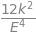

In [13]:
# carré de la courbure
Rcontra = tensorcontraction(tensorproduct(gu, R), (1,3))
Rcontra = tensorcontraction(tensorproduct(gu, Rcontra), (1,4))
Rcontra = tensorcontraction(tensorproduct(gu, Rcontra), (1,5))
R2 = tensorcontraction(tensorproduct(Rcov, Rcontra), (0,4))
R2 = tensorcontraction(R2, (0,3))
R2 = tensorcontraction(R2, (0,2))
R2 = tensorcontraction(R2, (0,1))
R2 = simplify(R2)
R2

In [14]:
# Courbure scalaire
Rm = tensorcontraction(tensorproduct(gu,Ricci), (1,2))
Rscal = tensorcontraction(Rm, (0,1))
simplify(Rscal)